max number of GNSS points 147
"tm_size" means the number of GNSS points
tm_size= 87


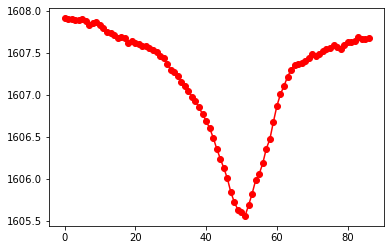

In [565]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ch = pd.read_csv("Ch_ele.txt", delim_whitespace=True,
          header=None, names=["Elev","Index"])
tr = pd.read_csv("trace.txt", delim_whitespace=True,
          header=None, names=["GPR_points"])


N = 110
max = 0

for i in np.arange(1,N+1,1):
    tm = ch.loc[ch["Index"]==str(i),["Elev"]]
    size = np.size(tm)

    if(max < size):
        max = size
    
print("max number of GNSS points",max)

GNSS = np.zeros(shape=(N,size))


tm = ch.loc[ch["Index"]==str(1),["Elev"]]
tm_size = np.size(tm)
print("\"tm_size\" means the number of GNSS points")
print("tm_size=",tm_size)

for j in np.arange(0,tm_size,1):
    GNSS[0][j] = tm["Elev"][j]

#print(np.size(GNSS[0][0:tm_size]))
plt.plot(GNSS[0][0:tm_size], "ro-")

G_point= 1547
Elev_ch2= 1547
[1.68713639 1.74337427 1.79961215 1.85585003 1.91208791 1.96832579
 2.02456367 2.08080155 2.13703943 2.19327731]


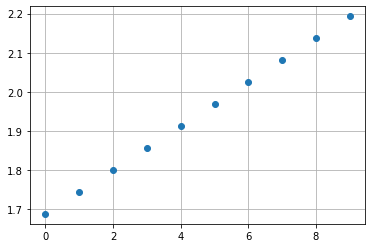

In [610]:
G_point = tr["GPR_points"][0]
print("G_point=",G_point)

ratio = tm_size / G_point

Elev_ch2 = np.zeros(shape=G_point)
tm2 = np.zeros(shape=G_point)

for k in np.arange(0,G_point,1):
    Elev_ch2[k] = k * ratio

print("Elev_ch2=",np.size(Elev_ch2))    

#plt.plot(Elev_ch2[:50],"o")
plt.plot(Elev_ch2[30:40],"o")

plt.grid()
print(Elev_ch2[30:40])

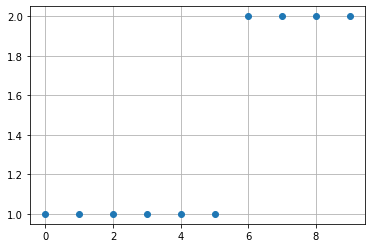

In [616]:
for i in np.arange(0,G_point,1):
    tm2[i]=int(Elev_ch2[i])
    
    
#plt.plot(tm2[0:25],"o")
plt.plot(tm2[30:40],"o")

plt.grid()

"d1" means the number of differentiation of tm2
d1= 1546


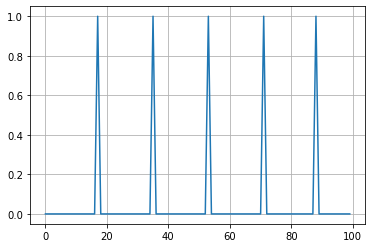

In [620]:
#to find where is the turning point?
#differentiation
d1 = np.diff(tm2)

print("\"d1\" means the number of differentiation of tm2")
print("d1=",np.size(d1))
#plt.plot(d1[0:25],"o")
plt.plot(d1[0:100],"-")

plt.grid()



In [615]:
GPR_elev = pd.DataFrame(d1, columns = {'1D'})
s_0=GPR_elev.loc[GPR_elev['1D'] == 1.0]

s_02 = (s_0.index+1).values
#s_02 = s_0.index+1
print("")
print(s_02)
print("s_02 size=",np.size(s_02))
#print(np.info(s_02))

#insert last element
s_03 = np.append(s_02,s_02[-1]+16)

print("")
print(s_03)
print("s_03 size=",np.size(s_03))
print("The reason why we need s_03 is that s_02 do not reflect the last part of the Elev_ch03")


[  18   36   54   72   89  107  125  143  161  178  196  214  232  249
  267  285  303  321  338  356  374  392  409  427  445  463  481  498
  516  534  552  570  587  605  623  641  658  676  694  712  730  747
  765  783  801  818  836  854  872  890  907  925  943  961  978  996
 1014 1032 1050 1067 1085 1103 1121 1139 1156 1174 1192 1210 1227 1245
 1263 1281 1299 1316 1334 1352 1370 1387 1405 1423 1441 1459 1476 1494
 1512 1530]
s_02 size= 86

[  18   36   54   72   89  107  125  143  161  178  196  214  232  249
  267  285  303  321  338  356  374  392  409  427  445  463  481  498
  516  534  552  570  587  605  623  641  658  676  694  712  730  747
  765  783  801  818  836  854  872  890  907  925  943  961  978  996
 1014 1032 1050 1067 1085 1103 1121 1139 1156 1174 1192 1210 1227 1245
 1263 1281 1299 1316 1334 1352 1370 1387 1405 1423 1441 1459 1476 1494
 1512 1530 1546]
s_03 size= 87
The reason why we need s_03 is that s_02 do not reflect the last part of the Elev_ch03


(1607.9, 1607.92)

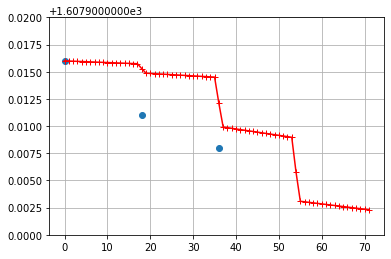

In [650]:
Elev_ch3 = np.zeros(shape=G_point)

Elev_ch3[0] =GNSS[0][0]
for j in s_02:
        Elev_ch3[j] =GNSS[0][int(j/18)]
Elev_ch3[-1] = GNSS[0][tm_size-1]

plt.plot(Elev_ch3[:72], 'o')


for j in (18, 36, 54, 72):    
    for i in np.arange(j-18,j+1,1):
        if(Elev_ch3[j]-Elev_ch3[j-18] > 0):
            Elev_ch3[i] = Elev_ch3[j-18] + ((i/18)*0.05) *(Elev_ch3[j] - Elev_ch3[j-18])/(0.05*18)

        elif(Elev_ch3[j]-Elev_ch3[j-18] < 0):
             Elev_ch3[i] = Elev_ch3[j-18] + ((i/18)*0.05) *(Elev_ch3[j] - Elev_ch3[j-18])/(0.05*18)                
"""
j=s_02[-1]+1
#print(j)
#print(G_point)
#print(G_point-j)
n = G_point - j

print(Elev_ch3[j-1])
print(Elev_ch3[j-n])
print(Elev_ch3[j-1] - Elev_ch3[j-n])

print("")
for i in np.arange(j,G_point,1): 
#        print(i)
        if(Elev_ch3[j-1]-Elev_ch3[j-n] > 0):
            Elev_ch3[i] = Elev_ch3[j-n] + ((i-j)*0.05) *(Elev_ch3[j-1] - Elev_ch3[j-n])/(0.05*n)
            
            
        elif(Elev_ch3[j-1]-Elev_ch3[j-n] < 0):
#            print(j-n)
            Elev_ch3[i] = Elev_ch3[j-n] + ((i-j)*0.05) *(Elev_ch3[j-1] - Elev_ch3[j-n])/(0.05*n)
#            print(Elev_ch3[j-n], Elev_ch3[j],j)
        #print(i, Elev_ch3[i])
"""

plt.plot(Elev_ch3[:72], 'r+-')
#plt.plot(Elev_ch3[0:36], 'ro')
plt.grid()
plt.ylim(1607.90,1607.92)
#print(Elev_ch3[18])
#print(Elev_ch3[19])
#print(Elev_ch3[20])